# Exp 1 :
Introduction to various ML platforms like Anaconda and COLAB. ii) Study of ML libraries and Tools (Keras etc)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.datasets import mnist # Dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
# Display dataset properties
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
num_classes = len(np.unique(train_labels))
print("Number of different labels in the dataset:", num_classes)
#Output 1
# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0
# Define the neural network model
def tfmodel():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='sigmoid')
    ])
    return model

model = tfmodel()
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model on the training data
hist = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)
#Output 2
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test-accuracy: {test_accuracy}')
#Output 3
# Make predictions on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)
#Output 4


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of different labels in the dataset: 10
Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2883 - accuracy: 0.9169 - val_loss: 0.1538 - val_accuracy: 0.9560
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1288 - accuracy: 0.9624 - val_loss: 0.1096 - val_accuracy: 0.9692
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0887 - accuracy: 0.9740 - val_loss: 0.0983 - val_accuracy: 0.9707
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0674 - accuracy: 0.9799 - val_loss: 0.0896 - val_accuracy: 0.9748
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0798 - accuracy: 0.9749
Test-accuracy: 0.9749000072479248
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


# EXP 2
Linear Regression
https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
ds =  pd.read_csv('Salary_Data.csv')
ds.head()
X = ds.iloc[:, 0].values
Y = ds.iloc[:, 1].values  # Assuming the target variable (salary) is in the second column

# Calculate coefficients using the correct formula approach
n = len(X)

#Formulation y = ax+b
a = (len(X)*sum(X*Y) - sum(X)*sum(Y))/(len(X) * sum(X**2)-(sum(X))**2)
b = (sum(Y))-(a*sum(X))/(len(X))
#Testing
x_test = [1.7,2.3,3.9,4.5,5.4]
y_pred = []

for i in range(len(x_test)):
  y_pred.append((a*x_test[i])+b)
  print(a,b)
  print(y_pred)

#Graph
from matplotlib import style
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(x_new,y_predict,color = 'blue',label = "Best fit line")
plt.scatter(X,Y,color='green',label= 'Actual Points')
# plt.scatter(x_test,y_pred,color='red',label = "Predicted Points")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend();
plt.ylim([0,13])
plt.ylim([30000,140000]);

#Output2

from matplotlib import style
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(x_new,y_predict,color = 'blue',label = "Best fit line")
# plt.scatter(X,Y,color='green',label= 'Actual Points')
plt.scatter(x_test,y_pred,color='red',label = "Predicted Points")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend();
plt.ylim([0,13])
plt.ylim([30000,140000]);

#Output 3


# EXP 3
Logistic

X1	X2	Actual Class	Prediction	Predicted Class	ŷ
1	2	0		0.0169		0		-4.07
2	4	0		0.0566		0		-2.82
3	6	0		0.1729		0		-1.57
4	8	0		0.4216		0		-0.32
5	10	1		0.7176		1		0.93
6	12	1		0.8986		1		2.18
7	14	1		0.9686		1		3.43
8	16	1		0.9908		1		4.68
9	18	1		0.9973		1		5.93
10	20	1		0.9992		1		7.18


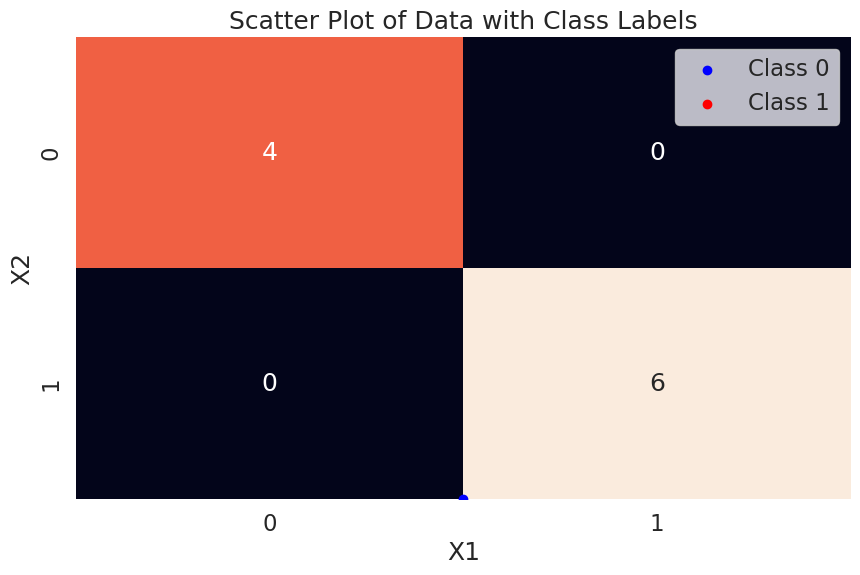

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
X1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X2 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Sample binary classification labels
n = len(X1)
# Initializing parameters
b0 = 0
b1 = 0
b2 = 0
# Learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000
# Gradient descent
for _ in range(num_iterations):
    # Calculate predictions
    predictions = 1 / (1 + np.exp(-(b0 + b1 * X1 + b2 * X2)))
    # Update parameters
    b0 -= learning_rate * np.sum(predictions - Y)
    b1 -= learning_rate * np.sum((predictions - Y) * X1)
    b2 -= learning_rate * np.sum((predictions - Y) * X2)
# Threshold for classification
s = 0.5
# Predictions
predicted_class = np.where(predictions >= s, 1, 0)
print("X1\tX2\tActual Class\tPrediction\tPredicted Class\tŷ")
for i in range(n):
    y_hat = b0 + b1 * X1[i] + b2 * X2[i]
    print(f"{X1[i]}\t{X2[i]}\t{Y[i]}\t\t{predictions[i]:.4f}\t\t{predicted_class[i]}\t\t{y_hat:.2f}")
#Output 1

conf_matrix = confusion_matrix(Y, predicted_class)
sns.set(font_scale =1.5)
def plot_conf_mat (cm) :
    fig,ax = plt.subplots(figsize =(10,6))
    ax = sns.heatmap(cm,annot=True,fmt='d',cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicteed label")
plot_conf_mat(conf_matrix)

#Output 2

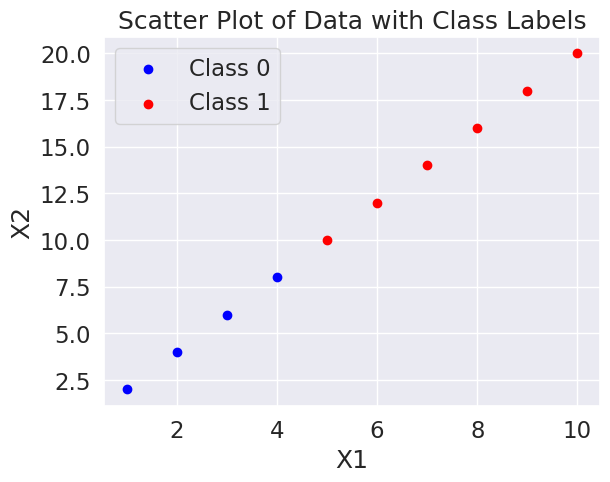

In [8]:
plt.scatter(X1[Y == 0], X2[Y == 0], color='blue', label='Class 0')
plt.scatter(X1[Y == 1], X2[Y == 1], color='red', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Data with Class Labels')
plt.legend()
plt.show()

# Exp 4
SVM


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  4]
 [ 1 70]]
Accuracy: 0.956140350877193


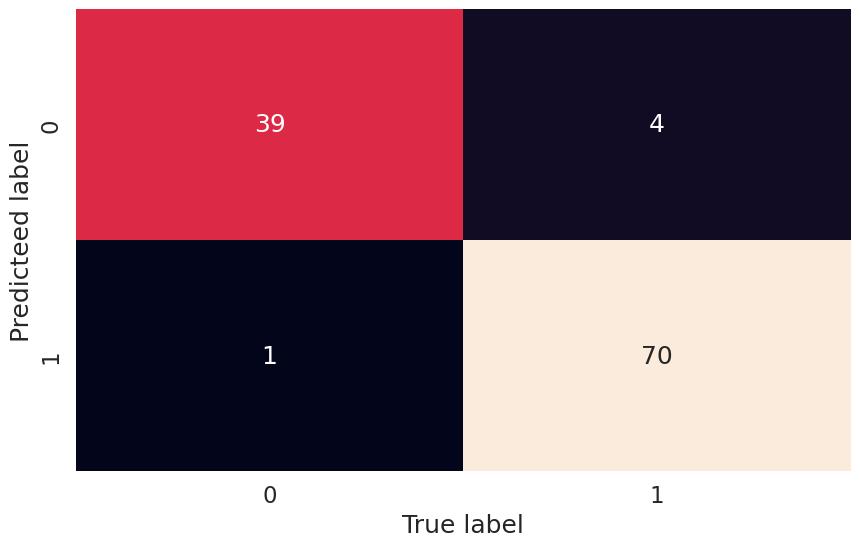

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['diagnosis'] = cancer.target
data.head()
#Output 1
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
#Output 2
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale =1.5)
def plot_conf_mat (cm) :
    fig,ax = plt.subplots(figsize =(10,6))
    ax = sns.heatmap(cm,annot=True,fmt='d',cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicteed label")
plot_conf_mat(cm)


# EXP 5

Hebbian


In [2]:
import pandas as pd
def hebbian(z,gate):
  # print input array
  gate = df = pd.DataFrame(columns=['X1','X2','Y','delw1','delw2','w1','w2','b','y_new'])
  print("w1 w2 b")
  b = w1 = w2 = 0
  for x1 , x2 , y in z :
      w1=w1+x1*y
      w2=w2+x2*y
      b=b+y
      print(w1,w2,b)
      ynew = w1*x1 + w2*x2 + b
      gate.loc[len(gate.index)] = [x1, x2, y,x1*y,x2*y,w1,w2,b,ynew]
  return gate

#OR GATE
input_array = [
    [-1,-1,-1],
    [-1,1,1],
    [1,-1,1],
    [1,1,1]
];
gate = hebbian(input_array,'and')
#Output 1

print(gate)
#Output 2


w1 w2 b
1 1 -1
0 2 0
1 1 1
2 2 2
   X1  X2  Y  delw1  delw2  w1  w2  b  y_new
0  -1  -1 -1      1      1   1   1 -1     -3
1  -1   1  1     -1      1   0   2  0      2
2   1  -1  1      1     -1   1   1  1      1
3   1   1  1      1      1   2   2  2      6


# EXP 7

McCulloch Pitts Model

In [6]:
def MpNew():
  X1 = [0, 0, 1, 1]
  X2 = [0, 1, 0, 1]
  T = [0, 1, 1, 1]

  Y=[]
  Act=[]
  W1 = int(input(print("Weight 1:")))
  W2 = int(input(print("Weight 2:")))

  for i in range(0,4):
    Y.append(W1*X1[i]+W2*X2[i])
  print(Y)

  # RValues=[0.5,0.7,1,3,4,2.5]
  # rv=[1]

  OTheta = int(input("Enter value of threshold !!!!!!! : "))
  print("theta: ",OTheta)

  for i in range(0,4):
    if(Y[i]>=OTheta):
      Act.append(1)
    elif(Y[i]<OTheta):
      Act.append(0)

  print("Actual Values : ",Act)

  if(Act==T):
    print("successful weights W1 :",W1, " W2 :", W2,
  "Threshold:", OTheta )
  elif(Act!=T):
    print("wrong values")

MpNew()


Weight 1:
None1
Weight 2:
None1
[0, 1, 1, 2]
Enter value of threshold !!!!!!! : 1
theta:  1
Actual Values :  [0, 1, 1, 1]
successful weights W1 : 1  W2 : 1 Threshold: 1


# EXP 8
Perceptron Model

In [11]:
import numpy as np

class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def activation_function(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)


# Instantiate the perceptron with a higher number of epochs to ensure learning
slp = SingleLayerPerceptron(learning_rate=0.1, epochs=50)

# Training data for AND gate
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([-1, -1, -1, 1])  # Outputs for AND gate: false (-1), false (-1), false (-1), true (1)

# Training the perceptron
slp.fit(X_train, y_train)

# Predicting with the trained perceptron to test if it has learned the AND logic
predictions = slp.predict(X_train)

# Correcting the access to internal variables
weights = slp.weights
bias = slp.bias

# Display the weights, bias, and predictions
weights, bias, predictions



(array([0.4, 0.2]), -0.4000000000000001, array([-1, -1, -1,  1]))

# EXP 9

PCA


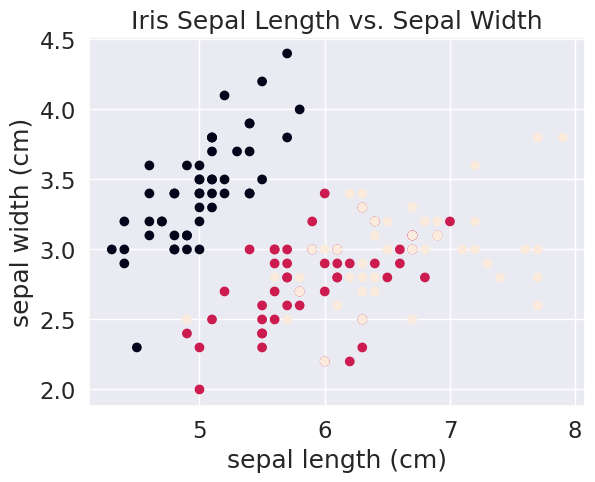

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

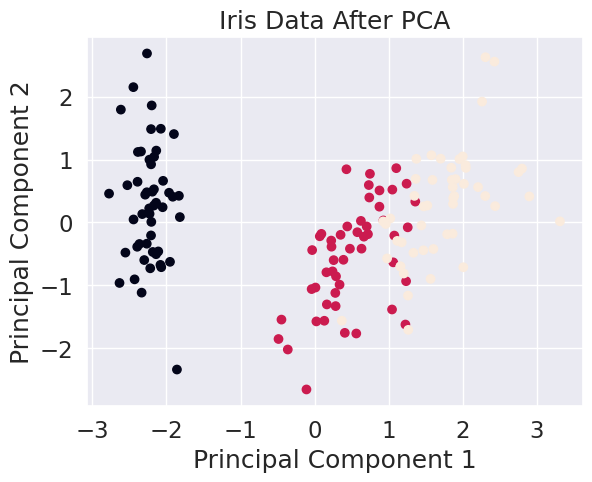

In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Target variable


feature1 = 0
feature2 = 1
plt.scatter(X[:, feature1], X[:, feature2], c=y)  # Color points by target class

# Add labels and title
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.title("Iris Sepal Length vs. Sepal Width")

# Show the plot
plt.show()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Assuming we want 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Print the transformed data
print(X_pca)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)  # Color points by target class

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Data After PCA")

# Show the plot
plt.show()
